# Importação do banco de dados

In [18]:
#libPaths()
#install.packages("readxl")
library(readxl)
bd<- read_excel("Planilha de dados_projetos LaNEx_planilha limpa2_080521 (1).xlsx",sheet = 1)
head(bd)
dim(bd)

ID,Diagnosis,Age,Sex,Comorbidity,Scholarity,IADL,BBS,STS,HG,...,DTC,STEP,FMT_IT,FMT_DT,MMSE,CDT,TMTA,DSF,DSB,VF
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,69.32512,1,2,3,1,56,10,23.5,...,36.852495,56,31.04,12.84,26,1,48,5,3,15
2,1,68.54757,1,2,4,1,56,11,27.9,...,1.004995,69,15.78,18.40,29,1,73,7,3,24
3,1,61.77960,1,5,4,1,56,15,21.7,...,14.662214,91,17.31,14.05,29,3,50,6,6,21
4,1,71.44695,1,2,2,1,56,18,23.7,...,29.813731,87,16.84,10.39,26,2,65,8,4,17
5,3,75.84394,2,0,4,NA,55,13,37.3,...,10.882431,105,82.00,138.00,26,2,56,8,6,18
6,1,71.32923,2,2,1,1,56,16,35.3,...,54.663985,131,112.43,16.00,26,1,47,7,6,14


[1] 192  23

# Análise exploratória

In [19]:
summary(bd)
bd<- bd[,-1]
data<- na.omit(bd) 
dim(data) #140 idosos após remoção dos Nas
table(data$Diagnosis) #(93, 21 e 26)
str(data)

       ID           Diagnosis          Age             Sex      
 Min.   :  1.00   Min.   :1.000   Min.   :59.69   Min.   :1.00  
 1st Qu.: 48.75   1st Qu.:1.000   1st Qu.:69.36   1st Qu.:1.00  
 Median : 96.50   Median :1.000   Median :74.28   Median :1.00  
 Mean   : 96.50   Mean   :1.693   Mean   :75.42   Mean   :1.24  
 3rd Qu.:144.25   3rd Qu.:3.000   3rd Qu.:81.49   3rd Qu.:1.00  
 Max.   :192.00   Max.   :3.000   Max.   :97.18   Max.   :2.00  
                                                                
  Comorbidity      Scholarity         IADL            BBS       
 Min.   :0.000   Min.   :1.000   Min.   :1.000   Min.   :40.00  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:54.00  
 Median :2.000   Median :3.000   Median :1.000   Median :55.00  
 Mean   :1.816   Mean   :2.861   Mean   :1.374   Mean   :54.37  
 3rd Qu.:2.000   3rd Qu.:4.000   3rd Qu.:2.000   3rd Qu.:56.00  
 Max.   :8.000   Max.   :4.000   Max.   :2.000   Max.   :56.00  
 NA's   :13      NA's   :

[1] 140  22


 1  2  3 
93 21 26 

tibble [140 x 22] (S3: tbl_df/tbl/data.frame)
 $ Diagnosis  : num [1:140] 1 1 1 1 1 1 1 2 3 3 ...
 $ Age        : num [1:140] 69.3 68.5 61.8 71.4 71.3 ...
 $ Sex        : num [1:140] 1 1 1 1 2 1 1 1 1 2 ...
 $ Comorbidity: num [1:140] 2 2 5 2 2 1 2 2 1 1 ...
 $ Scholarity : num [1:140] 3 4 4 2 1 4 4 4 1 4 ...
 $ IADL       : num [1:140] 1 1 1 1 1 1 1 1 2 2 ...
 $ BBS        : num [1:140] 56 56 56 56 56 56 54 55 54 55 ...
 $ STS        : num [1:140] 10 11 15 18 16 11 14 15 6 17 ...
 $ HG         : num [1:140] 23.5 27.9 21.7 23.7 35.3 19.7 17.9 25.1 15.9 36 ...
 $ GSST       : num [1:140] 1 1.02 1.18 1.1 1.48 ...
 $ GSDT       : num [1:140] 0.637 1.038 1.227 0.892 1.376 ...
 $ DeltaGS    : num [1:140] 0.3664 -0.0142 -0.0436 0.2134 0.1017 ...
 $ DTC        : num [1:140] 36.9 1 14.7 29.8 54.7 ...
 $ STEP       : num [1:140] 56 69 91 87 131 69 67 67 19 99 ...
 $ FMT_IT     : num [1:140] 31 15.8 17.3 16.8 112.4 ...
 $ FMT_DT     : num [1:140] 12.8 18.4 14.1 10.4 16 ...
 $ MMSE       : num [1

In [20]:
data$Diagnosis<- as.factor(data$Diagnosis)
data$Sex<- as.factor(data$Sex)
data$Scholarity<- as.factor(data$Scholarity)
data$IADL<- as.factor(data$IADL)

# Divisão em amostra de treino e de teste

In [21]:
#install.packages("caret")
require(caret)
set.seed(555)
train<- createDataPartition(data$Diagnosis,p=0.7,list=F)
data_train<- data[train,]
data_test<- data[-train,]
table(data_train$Diagnosis) #(66,15,19) 
table(data_test$Diagnosis) #(27,6,7)


 1  2  3 
66 15 19 


 1  2  3 
27  6  7 

# RFE-RF e RF


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD  KappaSD Selected
         2   0.7692 0.5078   0.061486 0.130465         
         3   0.8393 0.6327   0.028038 0.070873         
         4   0.7993 0.5711   0.040549 0.094472         
         5   0.7888 0.5499   0.047767 0.100760         
         6   0.8188 0.6037   0.051204 0.118256         
         7   0.8388 0.6599   0.046207 0.081962         
         8   0.8498 0.6659   0.005321 0.007723         
         9   0.8494 0.6686   0.037280 0.085031        *
        10   0.8283 0.6216   0.063154 0.140765         
        11   0.8293 0.6266   0.031925 0.077567         
        12   0.8203 0.6050   0.054787 0.129692         
        13   0.8298 0.6258   0.045446 0.109323         
        14   0.8298 0.6217   0.045446 0.112103         
        15   0.8293 0.6198   0.031925 0.071056         
        16   0.8198 0.5978   0.02846

[1] "MMSE"   "IADL"   "GSDT"   "FMT_DT" "FMT_IT" "GSST"   "TMTA"   "STEP"  
[9] "Age"

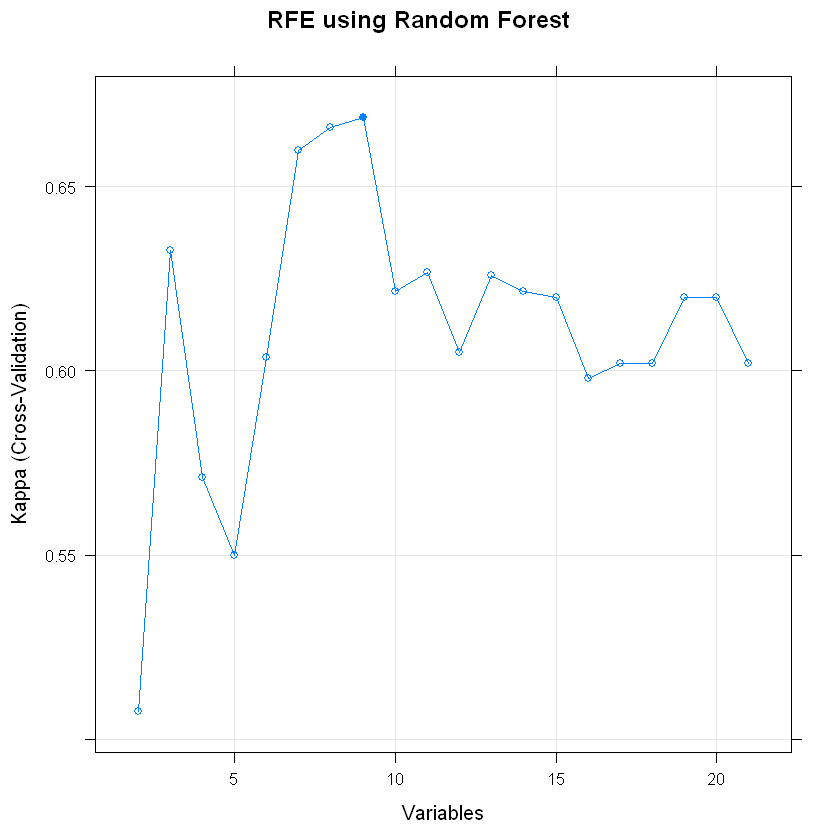

In [22]:
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(2)
control <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(3)
results <- rfe(data_train[,2:22], data_train[[1]], sizes=c(2:22),rfeControl=control,metric=ifelse(is.factor(data_train$Diagnosis),"Kappa","RMSE"))
print(results) #9 variáveis + diagnosis
#list the chosen features
predictors(results)
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

## RF a partir do subset definido pelo RFE-RF

Diagnosis,MMSE,IADL,GSDT,FMT_DT,FMT_IT,GSST,TMTA,STEP,Age
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,1,0.6369427,12.84,31.04,1.0033445,48,56,69.32512
1,29,1,1.0380623,18.40,15.78,1.0238908,73,69,68.54757
1,29,1,1.2269939,14.05,17.31,1.1834320,50,91,61.77960
1,26,1,0.8915305,10.39,16.84,1.1049724,65,87,71.44695
1,29,1,1.1560694,23.69,17.57,1.0830325,43,69,70.00000
1,28,1,0.7802341,34.65,18.59,0.8784773,55,67,83.04723


Random Forest 

100 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 79, 81, 80, 80 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8108020  0.5897794
  5     0.8012782  0.5670567
  9     0.7707519  0.5028310

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18%
Confusion matrix:
   1 2  3 class.error
1 64 0  2  0.03030303
2 11 1  3  0.93333333
3  2 0 17  0.10526316

Confusion Matrix and Statistics

   RF_prediction
     1  2  3
  1 26  0  1
  2  6  0  0
  3  1  0  6

Overall Statistics
                                          
               Accuracy : 0.8             
                 95% CI : (0.6435, 0.9095)
    No Information Rate : 0.825           
    P-Value [Acc > NIR] : 0.7427          
                                          
                  Kappa : 0.5152          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7879       NA   0.8571
Specificity            0.8571     0.85   0.9697
Pos Pred Value         0.9630       NA   0.8571
Neg Pred Value         0.4615       NA   0.9697
Prevalence             0.8250     0.00   0.1750
Detection Rate         0.6500     0.00   0.1500
Detection Prevalence   0.6750     0.15   0.1750
Balanced Accuracy      0.8225       NA   0.9134

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.7878788,0.8571429,0.9629630,0.4615385,0.9629630,0.7878788,0.8666667,0.825,0.65,0.675,0.8225108
Class: 2,NA,0.8500000,NA,NA,0.0000000,NA,NA,0.000,0.00,0.150,NA
Class: 3,0.8571429,0.9696970,0.8571429,0.9696970,0.8571429,0.8571429,0.8571429,0.175,0.15,0.175,0.9134199


rf variable importance

       Overall
MMSE    100.00
GSDT     59.25
IADL2    53.74
FMT_IT   47.34
FMT_DT   43.58
GSST     36.83
TMTA     27.15
Age      20.44
STEP      0.00

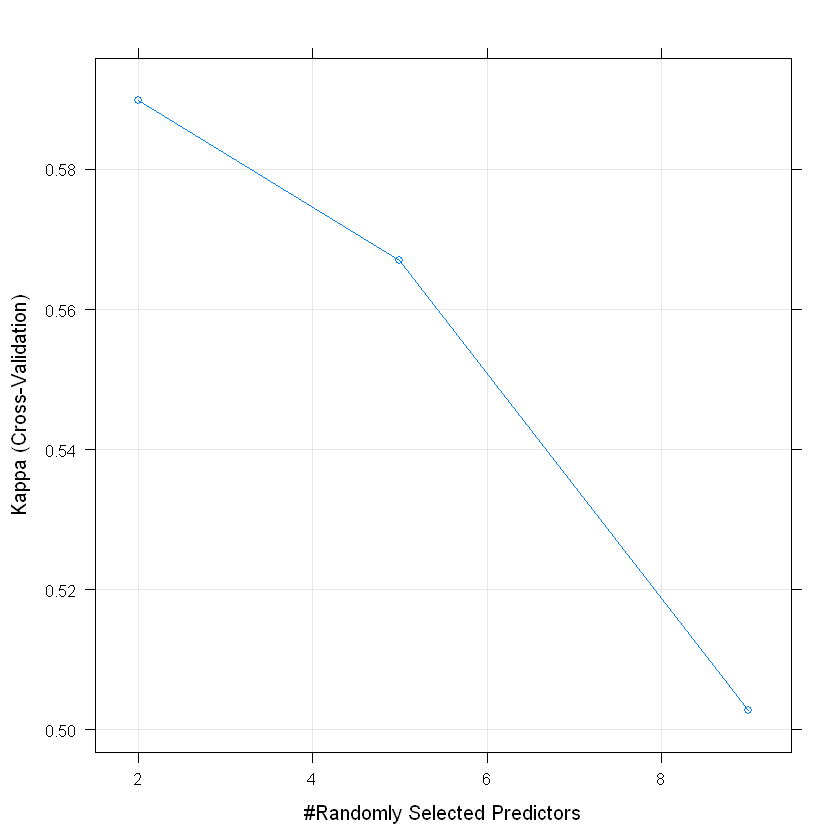

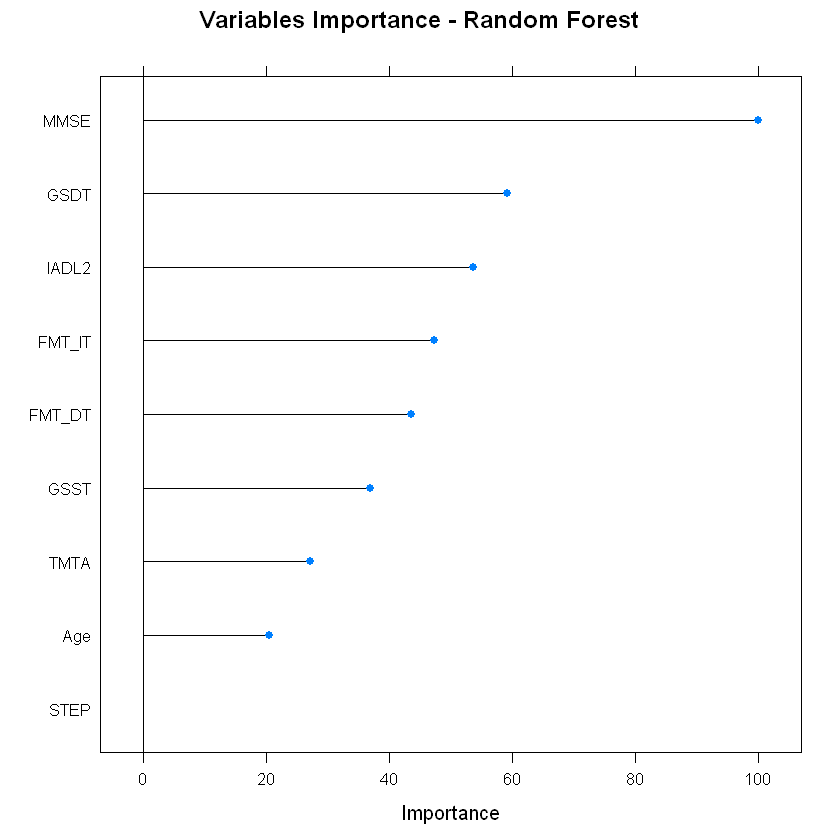

In [23]:
data_train_rfe<- data_train[,c("Diagnosis","MMSE",
                   "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
data_test_rfe<- data_test[,c("Diagnosis","MMSE",
                  "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
head(data_train_rfe)
set.seed(4)
RF_model1=train(Diagnosis~.,data=data_train_rfe,method='rf',metric=ifelse(is.factor(data_train_rfe$Diagnosis),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RF_model1 #Acurácia de 81.08% e kappa= 58,97%
plot(RF_model1)
#RF_model1$pred
#mtry2<- subset(RF_model1$pred,RF_model1$pred[4]==2)
#mtry2
RF_model1$finalModel #Acurácia=82%
RF_prediction<- predict(RF_model1,data_test_rfe)
confusionMatrix(table(data_test_rfe$Diagnosis,RF_prediction)) #Acurácia=80% e Kappa=51.52% 
confusionMatrix(table(data_test_rfe$Diagnosis,RF_prediction))$byClass #Recall e F1 CCL(NA e NA)
varImp(RF_model1)
plot(varImp(RF_model1),main="Variables Importance - Random Forest")

# RFE-DT e DT


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2     0.80 0.5746    0.03536 0.05111         
         3     0.78 0.5188    0.07583 0.12823         
         4     0.78 0.5359    0.11511 0.25259         
         5     0.81 0.5797    0.02236 0.05708         
         6     0.80 0.5699    0.03536 0.09248         
         7     0.82 0.6080    0.02739 0.07927         
         8     0.81 0.5927    0.02236 0.05559         
         9     0.83 0.6263    0.04472 0.11492        *
        10     0.83 0.6160    0.05701 0.15194         
        11     0.82 0.6102    0.02739 0.08332         
        12     0.80 0.5631    0.03536 0.08253         
        13     0.81 0.5921    0.02236 0.05485         
        14     0.81 0.5770    0.02236 0.04723         
        15     0.81 0.5770    0.02236 0.04723         
        16     0.82 0.6017    0.02739 0.06842      

[1] "MMSE"   "IADL"   "GSDT"   "FMT_DT" "FMT_IT" "GSST"   "TMTA"   "Sex"   
[9] "Age"

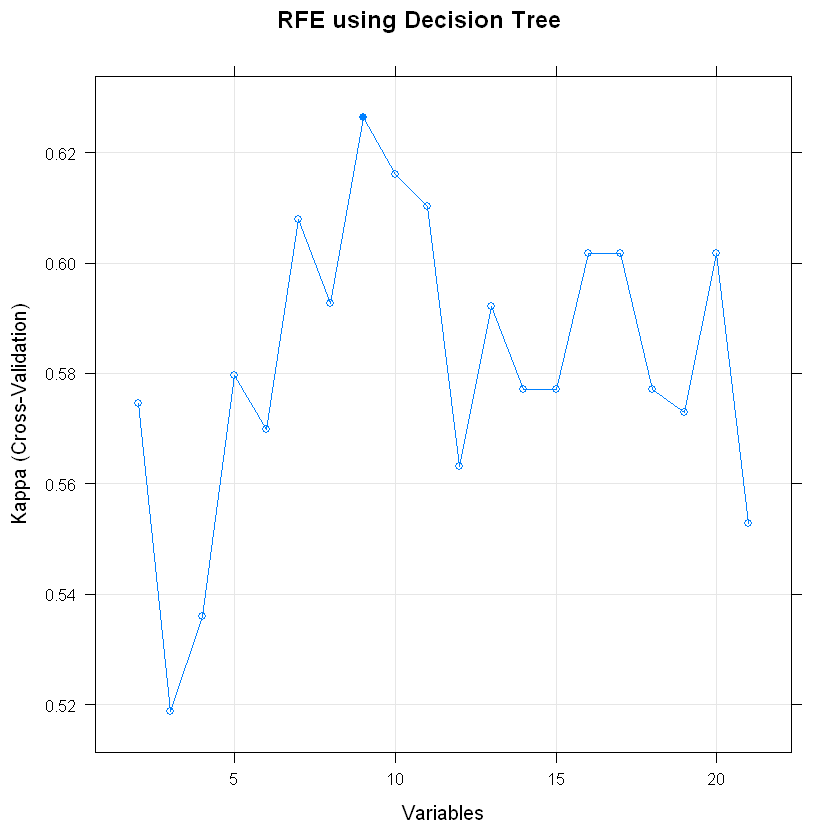

In [24]:
set.seed(22)
control2 <- rfeControl(functions=treebagFuncs, method="cv", number=5)
set.seed(33)
results2 <- rfe(data_train[,2:22], data_train[[1]], sizes=c(2:22),
                rfeControl=control,metric=ifelse(is.factor(data_train$Diagnosis),"Kappa","RMSE"))
print(results2) #9 variáveis + diagnosis
#list the chosen features
predictors(results2)
#plot the results
plot(results2, type=c("g", "o"),main="RFE using Decision Tree")

## DT a partir do subset definido pelo RFE-DT

Diagnosis,MMSE,IADL,GSDT,FMT_DT,FMT_IT,GSST,TMTA,Sex,Age
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,26,1,0.6369427,12.84,31.04,1.0033445,48,1,69.32512
1,29,1,1.0380623,18.40,15.78,1.0238908,73,1,68.54757
1,29,1,1.2269939,14.05,17.31,1.1834320,50,1,61.77960
1,26,1,0.8915305,10.39,16.84,1.1049724,65,1,71.44695
1,29,1,1.1560694,23.69,17.57,1.0830325,43,1,70.00000
1,28,1,0.7802341,34.65,18.59,0.8784773,55,1,83.04723


CART 

100 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 80, 79, 81, 80 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8103759  0.5738326
  0.05882353  0.7998496  0.5383441
  0.47058824  0.7101754  0.1869312

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

n= 100 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 100 34 1 (0.66000000 0.15000000 0.19000000)  
   2) MMSE>=23.5 82 16 1 (0.80487805 0.15853659 0.03658537)  
     4) FMT_IT< 33.145 54  3 1 (0.94444444 0.05555556 0.00000000) *
     5) FMT_IT>=33.145 28 13 1 (0.53571429 0.35714286 0.10714286)  
      10) Age< 72.44079 11  1 1 (0.90909091 0.09090909 0.00000000) *
      11) Age>=72.44079 17  8 2 (0.29411765 0.52941176 0.17647059) *
   3) MMSE< 23.5 18  2 3 (0.00000000 0.11111111 0.88888889) *

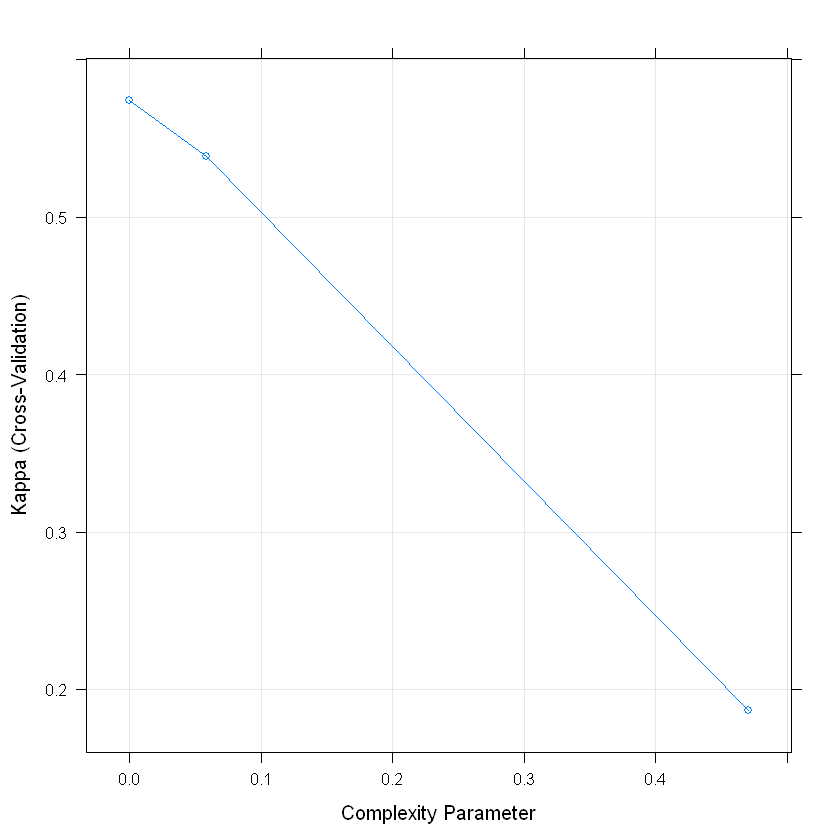

Confusion Matrix and Statistics

   Tree_prediction
     1  2  3
  1 24  3  0
  2  6  0  0
  3  1  0  6

Overall Statistics
                                         
               Accuracy : 0.75           
                 95% CI : (0.588, 0.8731)
    No Information Rate : 0.775          
    P-Value [Acc > NIR] : 0.7227         
                                         
                  Kappa : 0.431          
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7742   0.0000   1.0000
Specificity            0.6667   0.8378   0.9706
Pos Pred Value         0.8889   0.0000   0.8571
Neg Pred Value         0.4615   0.9118   1.0000
Prevalence             0.7750   0.0750   0.1500
Detection Rate         0.6000   0.0000   0.1500
Detection Prevalence   0.6750   0.1500   0.1750
Balanced Accuracy      0.7204   0.4189   0.9853

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.7741935,0.6666667,0.8888889,0.4615385,0.8888889,0.7741935,0.8275862,0.775,0.60,0.675,0.7204301
Class: 2,0.0000000,0.8378378,0.0000000,0.9117647,0.0000000,0.0000000,NaN,0.075,0.00,0.150,0.4189189
Class: 3,1.0000000,0.9705882,0.8571429,1.0000000,0.8571429,1.0000000,0.9230769,0.150,0.15,0.175,0.9852941


rpart variable importance

       Overall
IADL2   100.00
MMSE     86.56
GSST     71.34
GSDT     61.49
FMT_DT   50.85
Age      37.42
FMT_IT   33.40
Sex2     11.26
TMTA      0.00

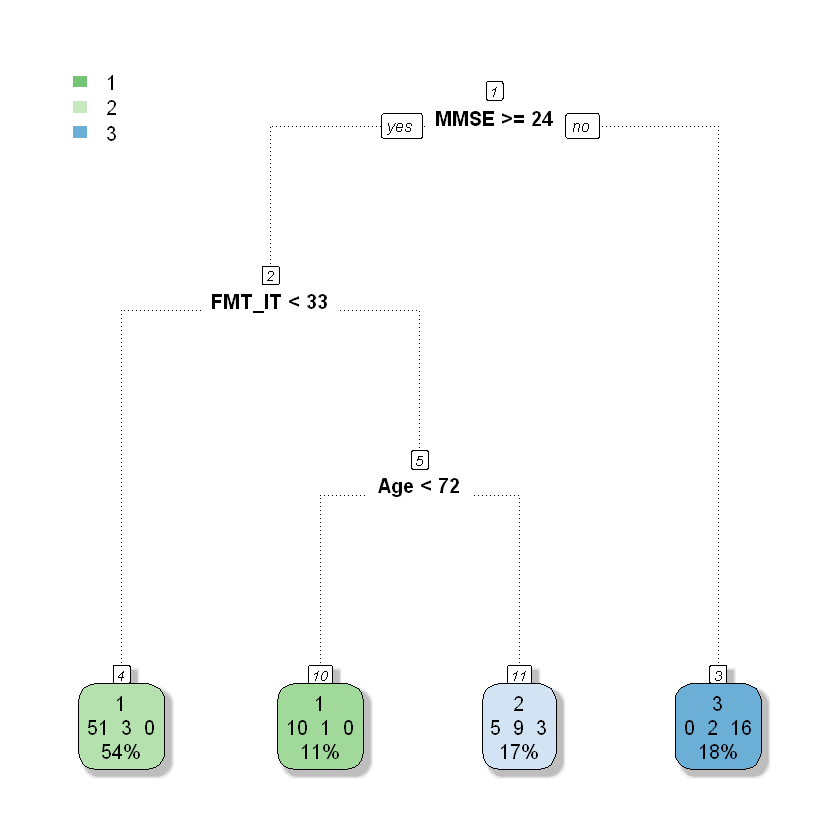

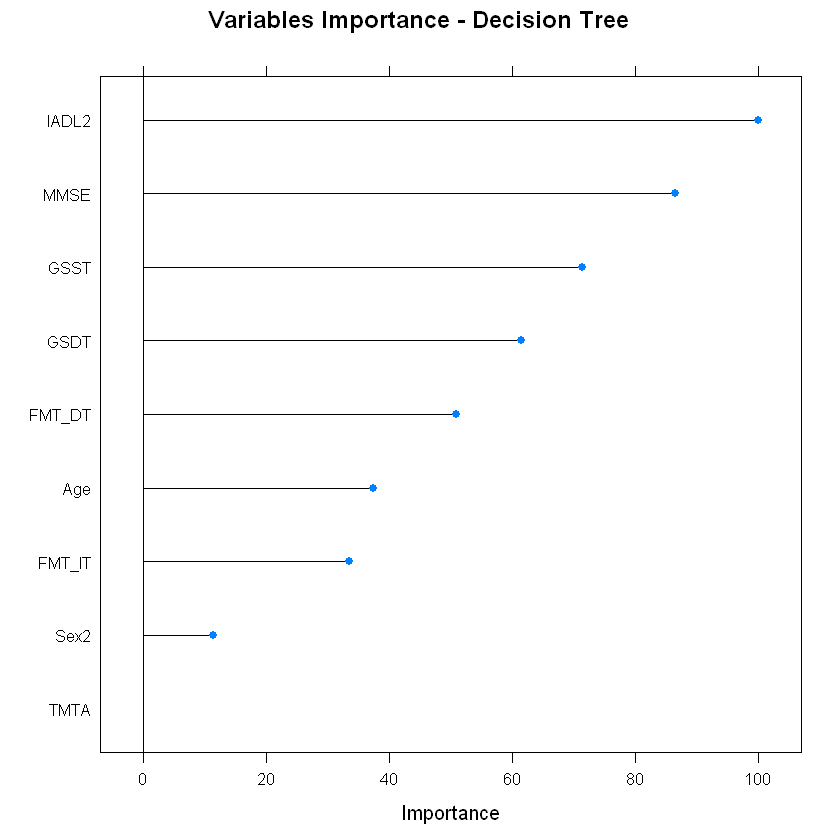

In [25]:
data_train_rfe2<- data_train[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
data_test_rfe2<- data_test[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
head(data_train_rfe2)
colnames(data_train_rfe2) <- make.names(colnames(data_train_rfe2))
set.seed(44)
Tree_model1=train(Diagnosis~.,data=data_train_rfe2,method='rpart',metric="Kappa",trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_model1 #Acurácia=81.03% e kappa=57.38% e cp=0
#Tree_model1$pred
plot(Tree_model1)
Tree_model1$finalModel
#install.packages("rpart.plot")
require(rpart.plot)
rpart.plot(Tree_model1$finalModel,type=0,extra=101,box.palette = "GnBu",
           branch.lty=3,shadow.col = "gray",nn=T,cex=1) 
Tree_prediction<- predict(Tree_model1,data_test_rfe2)
confusionMatrix(table(data_test_rfe2$Diagnosis,Tree_prediction)) #Acurácia=75% e Kappa=43.10% 
confusionMatrix(table(data_test_rfe2$Diagnosis,Tree_prediction))$byClass #Recall e F1 CCL(0 e NA) 
varImp(Tree_model1)
plot(varImp(Tree_model1),main="Variables Importance - Decision Tree")

# Aumento de dados (*ROSE*)

In [26]:
#install.packages("ROSE")
require(ROSE)
#sau e ccl
data_train$Diagnosis<-as.numeric(data_train$Diagnosis)
data_train_ccl<- data_train[data_train$Diagnosis!="3",] #Apenas saudáveis e CCL
table(data_train$Diagnosis) #(66,15)
data_train_ccl$Diagnosis<- as.factor(data_train_ccl$Diagnosis)
set.seed(111)
data_train_augmented_rose<- ovun.sample(Diagnosis~.,data=data_train_ccl,method = "over",N=132)$data
table(data_train_augmented_rose$Diagnosis) #(66,66)
#Sau e DA
data_train$Diagnosis<-as.numeric(data_train$Diagnosis)
data_train_da<- data_train[data_train$Diagnosis!="2",] #Apenas saudáveis e DA
table(data_train_da$Diagnosis) #(66,19)
data_train_da$Diagnosis<- as.factor(data_train_da$Diagnosis)
set.seed(222)
data_train_augmented_rose2<- ovun.sample(Diagnosis~.,data=data_train_da,method = "over",N=132)$data
table(data_train_augmented_rose2$Diagnosis) #(66,66)
#Unindo DA do fold01_treino_aumentado_rose2 com o fold01_treino_aumentado_rose
data_train_augmented_rose2<- data_train_augmented_rose2[data_train_augmented_rose2$Diagnosis!="1",]
data_train_augmented_rose_final<- rbind(data_train_augmented_rose,data_train_augmented_rose2)
dim(data_train_augmented_rose_final) # 198 x 22
table(data_train_augmented_rose_final$Diagnosis) #(66,66,66)

Loading required package: ROSE

Loaded ROSE 0.0-4





 1  2  3 
66 15 19 


 1  2 
66 66 


 1  3 
66 19 


 1  3 
66 66 

[1] 198  22


 1  2  3 
66 66 66 

## RF a partir dos dados aumentados

In [27]:
set.seed(333)
data_train_augmented_rose_final_rfe<- data_train_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
rf_rose<- randomForest(data_train_augmented_rose_final_rfe$Diagnosis~.,data = data_train_augmented_rose_final_rfe) 
rf_rose
#Validação do modelo
data_test_augmented_rose_final_rfe<- data_test[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_rose<- predict(rf_rose,data_test_augmented_rose_final_rfe)
Metrics_rose<- confusionMatrix(table(data_test_augmented_rose_final_rfe$Diagnosis,prediction_rose))$byClass 
Metrics_rose
varImp(rf_rose)


Call:
 randomForest(formula = data_train_augmented_rose_final_rfe$Diagnosis ~      ., data = data_train_augmented_rose_final_rfe) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.03%
Confusion matrix:
   1  2  3 class.error
1 62  2  2  0.06060606
2  1 65  0  0.01515152
3  0  1 65  0.01515152

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.8125,0.875,0.962963,0.5384615,0.962963,0.8125,0.8813559,0.8,0.650,0.675,0.84375
Class: 2,NA,0.850,NA,NA,0.000000,NA,NA,0.0,0.000,0.150,NA
Class: 3,0.8750,1.000,1.000000,0.9696970,1.000000,0.8750,0.9333333,0.2,0.175,0.175,0.93750


,Overall
,<dbl>
MMSE,22.474397
IADL,15.281513
GSDT,16.792789
FMT_DT,11.418814
FMT_IT,15.682002
GSST,19.207228
TMTA,9.665039
STEP,8.717457
Age,12.168034


## DT a partir dos dados aumentados

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.8000000,0.5333333,0.7407407,0.6153846,0.7407407,0.8000000,0.7692308,0.625,0.500,0.675,0.6666667
Class: 2,0.1111111,0.8387097,0.1666667,0.7647059,0.1666667,0.1111111,0.1333333,0.225,0.025,0.150,0.4749104
Class: 3,0.8333333,0.9411765,0.7142857,0.9696970,0.7142857,0.8333333,0.7692308,0.150,0.125,0.175,0.8872549


,Overall
,<dbl>
Age,23.537597
FMT_DT,10.874327
FMT_IT,35.525702
GSDT,60.159367
GSST,57.257235
IADL,54.373749
MMSE,69.737073
Sex,6.677542
TMTA,42.291603


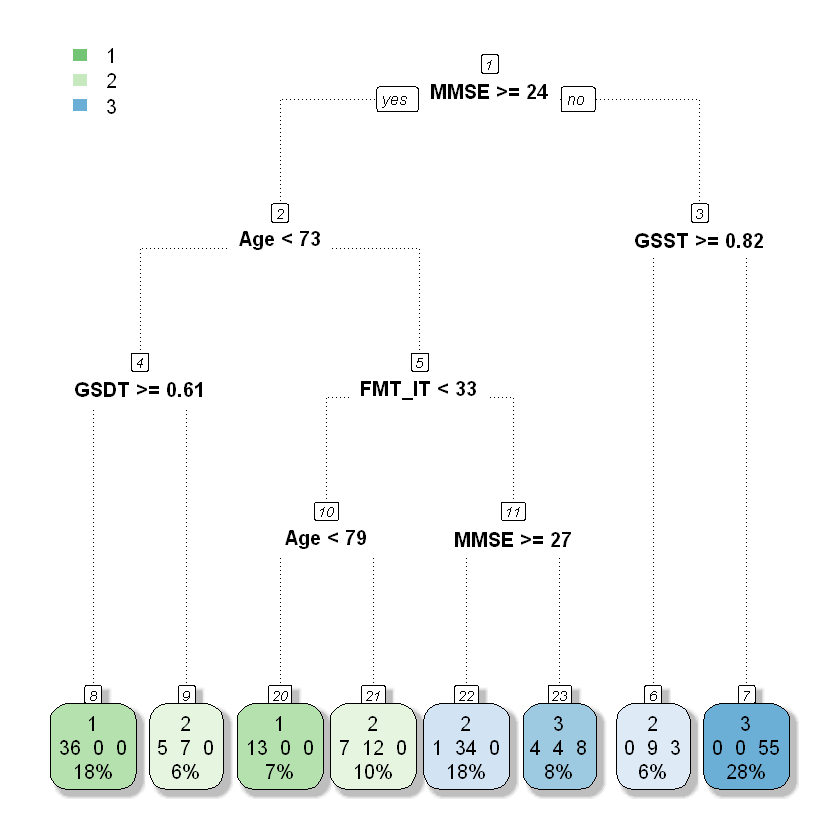

In [28]:
set.seed(301)
data_train_augmented_rose_final2_rfe<- data_train_augmented_rose_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_rose<- rpart(data_train_augmented_rose_final2_rfe$Diagnosis~.,data=data_train_augmented_rose_final2_rfe,method = "class")
data_test_augmented_rose_final2_rfe<- data_test[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_rose_tree<- predict(tree_rose,data_test_augmented_rose_final2_rfe,type="class")
Metrics_rose_tree<- confusionMatrix(data_test_augmented_rose_final2_rfe$Diagnosis,prediction_rose_tree)$byClass 
Metrics_rose_tree
rpart.plot(tree_rose,type=0,extra=101,box.palette = "GnBu",
           branch.lty=3,shadow.col = "gray",nn=T,cex=1) 
varImp(tree_rose)